In [65]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## Reading in all the trade and market data for round 1

In [134]:
price_day_m1 = pd.read_csv('data/prices_round_1_day_-1.csv', sep = ';')
price_day_m2 = pd.read_csv('data/prices_round_1_day_-2.csv', sep = ';')
price_day_0 = pd.read_csv('data/prices_round_1_day_0.csv', sep = ';')
trades_day_m1 = pd.read_csv('data/trades_round_1_day_-1.csv', sep = ';')
trades_day_m2 = pd.read_csv('data/trades_round_1_day_-2.csv', sep = ';')
trades_day_0 = pd.read_csv('data/trades_round_1_day_0.csv', sep = ';')

# Store all trades and price dataframes in a list
prices = [price_day_0, price_day_m1, price_day_m2]
trades = [trades_day_0, trades_day_m1, trades_day_m2]

In [138]:
trades_day_0['day'] = 0
trades_day_m1['day'] = -1
trades_day_m2['day'] = -2

In [33]:
# # Merge price and quantity and visualse for trades
# for df in trades:
#     df['total_seashells'] = df['quantity'] * df['price']

# # visualise the total seashells across timestamp for resin, kelp and ink

# for idx, df in enumerate(trades, start=1):
#     plt.figure(figsize=(10, 5))  # Create a new figure for each DataFrame
    
#     # Group the DataFrame by 'symbol'
#     grouped = df.groupby('symbol')
    
#     # Iterate over each group (symbol)
#     for symbol, group in grouped:
#         # It's a good idea to sort by timestamp if the data isn't already sorted
#         group_sorted = group.sort_values(by='timestamp')
#         plt.plot(group_sorted['timestamp'], group_sorted['total_seashells'],
#                  marker='o', label=symbol)
    
#     # Labeling the axes and the plot
#     plt.xlabel('Timestamp')
#     plt.ylabel('Total Seashells')
#     plt.title(f'DataFrame {idx}: Total Seashells Over Time by Symbol')
#     plt.legend()
#     plt.grid(True)  # Optional, to add a grid for easier reading
#     plt.tight_layout()
#     plt.show()

## How often do prices/quotes raise/fall to any given threshold?

We want to answer the question above.

Assuming a mean reverting price process with mean 10'000 for kelp a buy-low/sell-high strategy has to decide the following:
- buy at what price and quantity
- sell at what price and quantity

Questions:
- How much profit per round trip?
- How often does opportunity occur?
- Is sufficient volume available?

In [34]:
prices_resin = [
    df.query('product == "RAINFOREST_RESIN"') for df in prices
]
trades_resin = [
    df.query('symbol == "RAINFOREST_RESIN"') for df in trades
]

In [35]:
df_resin_quotes = (
    prices_resin[0]
    .append(prices_resin[1])
    .append(prices_resin[2])
    .sort_values(by=['day', 'timestamp'])
)


C:\Users\94liu\AppData\Local\Temp\ipykernel_25416\2928612508.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(prices_resin[1])
C:\Users\94liu\AppData\Local\Temp\ipykernel_25416\2928612508.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(prices_resin[2])


In [38]:

df_resin_trades = (
    trades_resin[0]
    .append(trades_resin[1])
    .append(trades_resin[2])
    .sort_values(by=['day', 'timestamp'])
)


C:\Users\94liu\AppData\Local\Temp\ipykernel_25416\428624204.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(trades_resin[1])
C:\Users\94liu\AppData\Local\Temp\ipykernel_25416\428624204.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(trades_resin[2])


In [39]:
ask_prices_1 = sorted(df_resin_quotes.ask_price_1.unique())
bid_prices_1 = sorted(df_resin_quotes.bid_price_1.unique())

In [40]:
(
    df_resin_quotes
    .query('bid_price_1 == 9995')
)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
12,-2,400,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,9998,3,10002.0,9.0,10005.0,20.0,9996.5,0.0
16,-2,500,RAINFOREST_RESIN,9995,30,NaN,NaN,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10000.0,0.0
20,-2,600,RAINFOREST_RESIN,9995,30,NaN,NaN,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10000.0,0.0
28,-2,900,RAINFOREST_RESIN,9995,30,NaN,NaN,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10000.0,0.0
44,-2,1400,RAINFOREST_RESIN,9995,26,NaN,NaN,NaN,NaN,9998,3,10005.0,26.0,NaN,NaN,9996.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29950,0,998300,RAINFOREST_RESIN,9995,21,NaN,NaN,NaN,NaN,10005,21,NaN,NaN,NaN,NaN,10000.0,0.0
29960,0,998600,RAINFOREST_RESIN,9995,22,NaN,NaN,NaN,NaN,10005,22,NaN,NaN,NaN,NaN,10000.0,0.0
29984,0,999400,RAINFOREST_RESIN,9995,26,NaN,NaN,NaN,NaN,10005,26,NaN,NaN,NaN,NaN,10000.0,0.0
29985,0,999500,RAINFOREST_RESIN,9995,28,NaN,NaN,NaN,NaN,10002,6,10005.0,28.0,NaN,NaN,9998.5,0.0


In [161]:
(
    df_resin_quotes
    .query('ask_price_1 == 10005')
)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
4,-2,100,RAINFOREST_RESIN,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
16,-2,500,RAINFOREST_RESIN,9995,30,NaN,NaN,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10000.0,0.0
20,-2,600,RAINFOREST_RESIN,9995,30,NaN,NaN,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10000.0,0.0
28,-2,900,RAINFOREST_RESIN,9995,30,NaN,NaN,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10000.0,0.0
41,-2,1300,RAINFOREST_RESIN,10000,3,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10002.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,0,998600,RAINFOREST_RESIN,9995,22,NaN,NaN,NaN,NaN,10005,22,NaN,NaN,NaN,NaN,10000.0,0.0
29964,0,998800,RAINFOREST_RESIN,10002,2,9995.0,26.0,NaN,NaN,10005,26,NaN,NaN,NaN,NaN,10003.5,0.0
29972,0,999000,RAINFOREST_RESIN,10002,5,9995.0,27.0,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10003.5,0.0
29984,0,999400,RAINFOREST_RESIN,9995,26,NaN,NaN,NaN,NaN,10005,26,NaN,NaN,NaN,NaN,10000.0,0.0


There is a market making bot buying at 9995 and selling at 10005 at large volumes.
We want to create a similar market making strategy around fair value 10'000 to match the bot.

### Testing all combinations of buy low/ sell high

In [162]:
print(ask_prices_1)


[9998, 10000, 10002, 10004, 10005]


In [163]:
print(bid_prices_1)

[9995, 9996, 9998, 10000, 10002]


In [164]:
buy_price = 9998
sell_price = 9998

In [165]:
df_resin_quotes.iloc[0]

day                              -2
timestamp                         0
product            RAINFOREST_RESIN
bid_price_1                    9996
bid_volume_1                      1
bid_price_2                    9995
bid_volume_2                     25
bid_price_3                     NaN
bid_volume_3                    NaN
ask_price_1                   10004
ask_volume_1                      1
ask_price_2                   10005
ask_volume_2                     25
ask_price_3                     NaN
ask_volume_3                    NaN
mid_price                     10000
profit_and_loss                   0
Name: 0, dtype: object

In [166]:
n_roundtrips = 0
count_ask_price = 0
count_bid_price = 0
enter = False
exit = False
for idx, row in df_resin_quotes.iterrows():
    # print(row)
    if not enter and row.ask_price_1 <= buy_price:
        print('buying')
        count_ask_price += 1
        enter = True
    if enter and row.bid_price_3 >= sell_price:
        print('selling')
        exit = True
        enter = False
        count_bid_price += 0
        n_roundtrips += 1
print(n_roundtrips)



buying
selling
buying
selling
buying
selling
buying
selling
buying
selling
buying
selling
buying
selling
buying
selling
buying
8


In [167]:
df_resin_trades['avg_price'] = df_resin_trades['total_seashells'] / df_resin_trades['quantity']

In [189]:
new_df = pd.merge(
    left=df_resin_trades,
    right=df_resin_quotes,
    how='left',
    left_on=['day', 'timestamp'],
    right_on=['day', 'timestamp'],
    
)

In [60]:
new_df = (
    new_df
        .assign(match_ask= lambda new_df: new_df.price == new_df.ask_price_1)
        .assign(match_bid= lambda new_df: new_df.price == new_df.bid_price_1)
)
new_df = (
    new_df
        .assign(match_first= lambda new_df: new_df.match_ask  | new_df.match_bid)
)

In [64]:
new_df.columns

Index(['timestamp', 'buyer', 'seller', 'symbol', 'currency', 'price',
       'quantity', 'day', 'total_seashells', 'avg_price', 'product',
       'bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2',
       'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1',
       'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3',
       'mid_price', 'profit_and_loss', 'match_ask', 'match_bid',
       'match_first'],
      dtype='object')

In [67]:
new_df.query('match_first == False')[['day', 'timestamp', 'price', 'quantity', 'avg_price', 'ask_price_1', 'bid_price_1', 'mid_price']].head(10)

,day,timestamp,price,quantity,avg_price,ask_price_1,bid_price_1,mid_price
17,-2,10100,9998.0,1,9998.0,10005,10000,10002.5
21,-2,13600,9998.0,1,9998.0,10005,10000,10002.5
27,-2,17300,10002.0,1,10002.0,10004,9996,10000.0
41,-2,23000,9998.0,4,9998.0,10004,10002,10003.0
42,-2,23300,9998.0,2,9998.0,10002,10000,10001.0
73,-2,32800,9995.0,2,9995.0,10000,9996,9998.0
87,-2,41500,10002.0,1,10002.0,10000,9996,9998.0
100,-2,46200,9998.0,1,9998.0,10005,10000,10002.5
141,-2,60400,9998.0,1,9998.0,10004,9996,10000.0
151,-2,64500,10002.0,1,10002.0,10005,9995,10000.0


In [187]:
new_df

Index(['timestamp', 'buyer', 'seller', 'symbol', 'currency', 'price',
       'quantity', 'day', 'total_seashells', 'avg_price', 'product',
       'bid_price_1', 'bid_volume_1', 'bid_volume_2', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_volume_2', 'ask_volume_3',
       'mid_price', 'profit_and_loss'],
      dtype='object')

## Distribution of next increment

Notably for rainforest resin there is a hard floor of bid prices at 9995 and hard ceiling of ask prices at 10005 due to the market maker bot. 

In [46]:
mid_prices = sorted(df_resin_quotes.mid_price.unique())
print(mid_prices)

[9996.5, 9997.0, 9997.5, 9998.0, 9998.5, 9999.0, 10000.0, 10001.0, 10001.5, 10002.0, 10002.5, 10003.0, 10003.5]


In [51]:
df_resin_quotes['increment'] = df_resin_quotes.shift(-1)['mid_price'] - df_resin_quotes['mid_price']

array([[<Axes: title={'center': '9996.5'}>,
        <Axes: title={'center': '9997.0'}>,
        <Axes: title={'center': '9997.5'}>,
        <Axes: title={'center': '9998.0'}>],
       [<Axes: title={'center': '9998.5'}>,
        <Axes: title={'center': '9999.0'}>,
        <Axes: title={'center': '10000.0'}>,
        <Axes: title={'center': '10001.0'}>],
       [<Axes: title={'center': '10001.5'}>,
        <Axes: title={'center': '10002.0'}>,
        <Axes: title={'center': '10002.5'}>,
        <Axes: title={'center': '10003.0'}>],
       [<Axes: title={'center': '10003.5'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

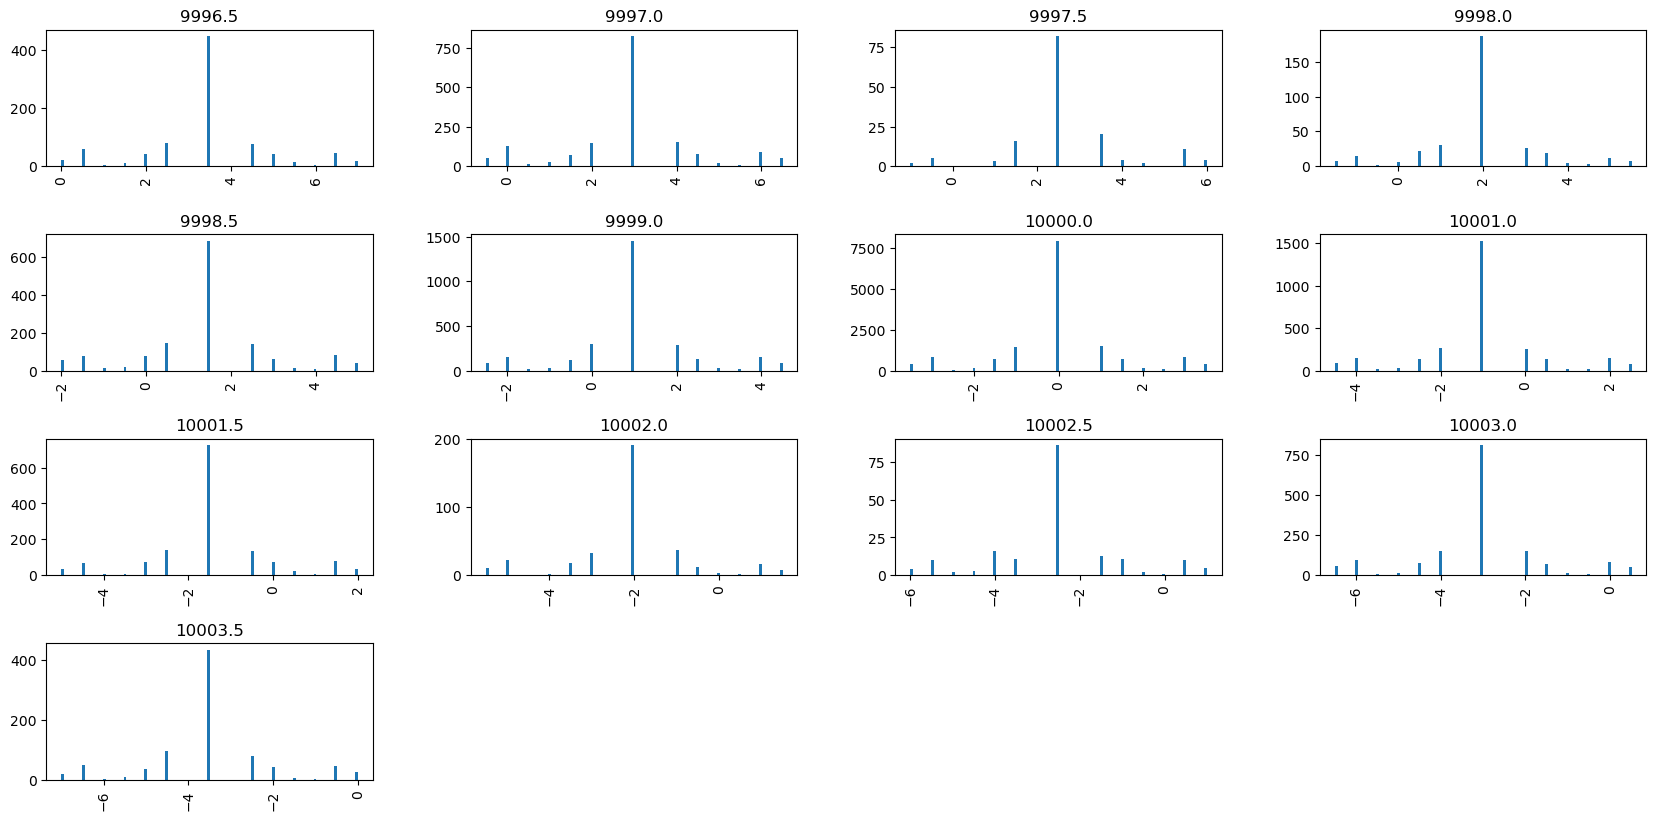

In [54]:
df_resin_quotes.hist(column='increment', by='mid_price', bins=100, figsize=(20, 10), grid=False)

The histograms show that there is a very high probability that the next mid price is at 10'000.